In [1]:
# Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils 

In [2]:
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except (ValueError, msg):
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

## 397nm Graphs and Peak Difference

In [4]:
df = pd.read_csv('HD_5Angstroms_397.csv')
df = df.reset_index(drop = True)
df.columns=['ds','nA']

In [33]:
yhat=savitzky_golay(np.asarray(df.nA),30001,3)
df['yhat'] = yhat

In [34]:
dfx = df[(df.ds < 60) & (df.ds >10) ]

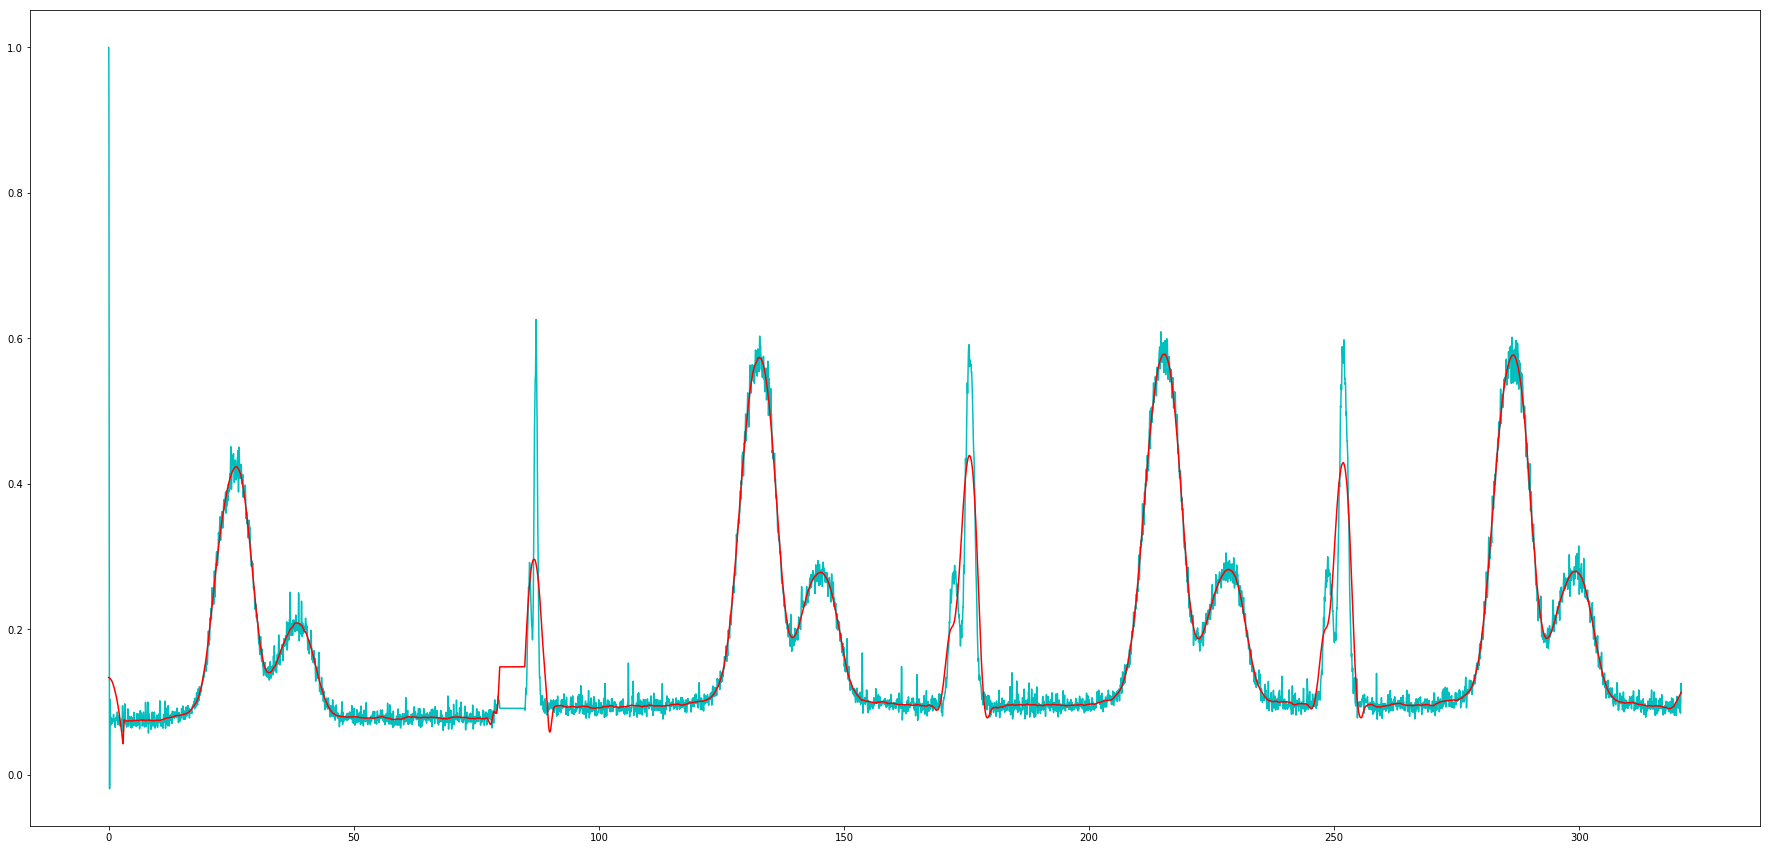

In [35]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df.ds, df.nA, 'c')
plt.plot(df.ds, yhat, 'r')
plt.show()

First Measurement

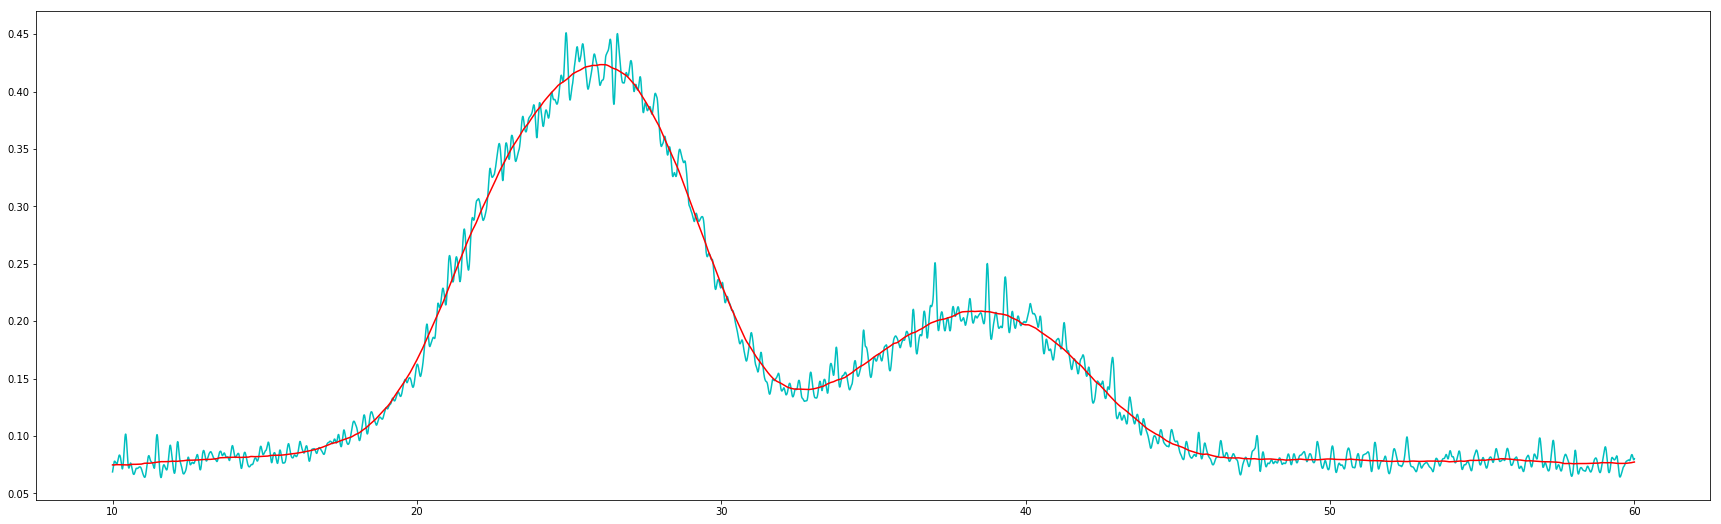

In [36]:
plt.figure(figsize=(30,9))
plt.plot(dfx.ds, dfx.nA, 'c')
plt.plot(dfx.ds, dfx.yhat, 'r')
plt.show()

Find indexes where there is a peak using peakutil package

In [37]:
indexes = peakutils.indexes(yhat, thres=0.25, min_dist=10000)
xmax = [df.ds[i] for i in indexes]

In [38]:
print(indexes)

[ 129816  191278  405787  633865  697288  846895 1044243 1077850 1108266
 1224071 1395797 1428052 1459501]


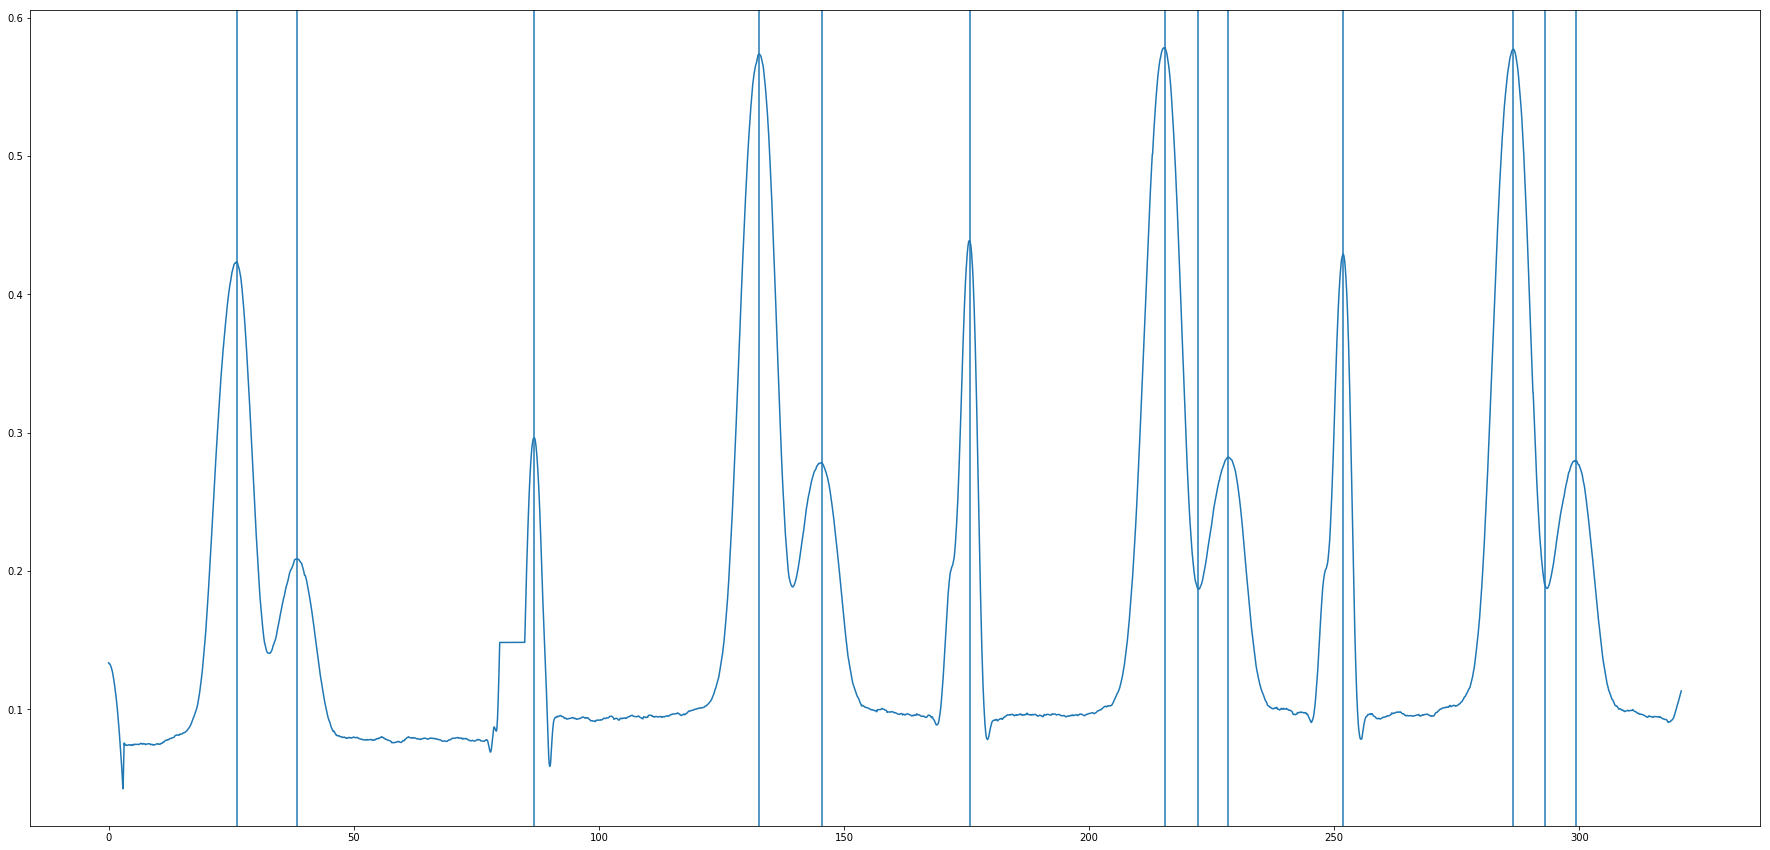

In [41]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
for xc in xmax:
    plt.axvline(x=xc)
plt.show()

Peak detector finds correct peaks at : 0,1,3,4,6,8,10,12

In [43]:
ind = 0,1,3,4,6,8,10,12

In [44]:
xmax_2 = [xmax[i] for i in ind]

Validation of correct peaks

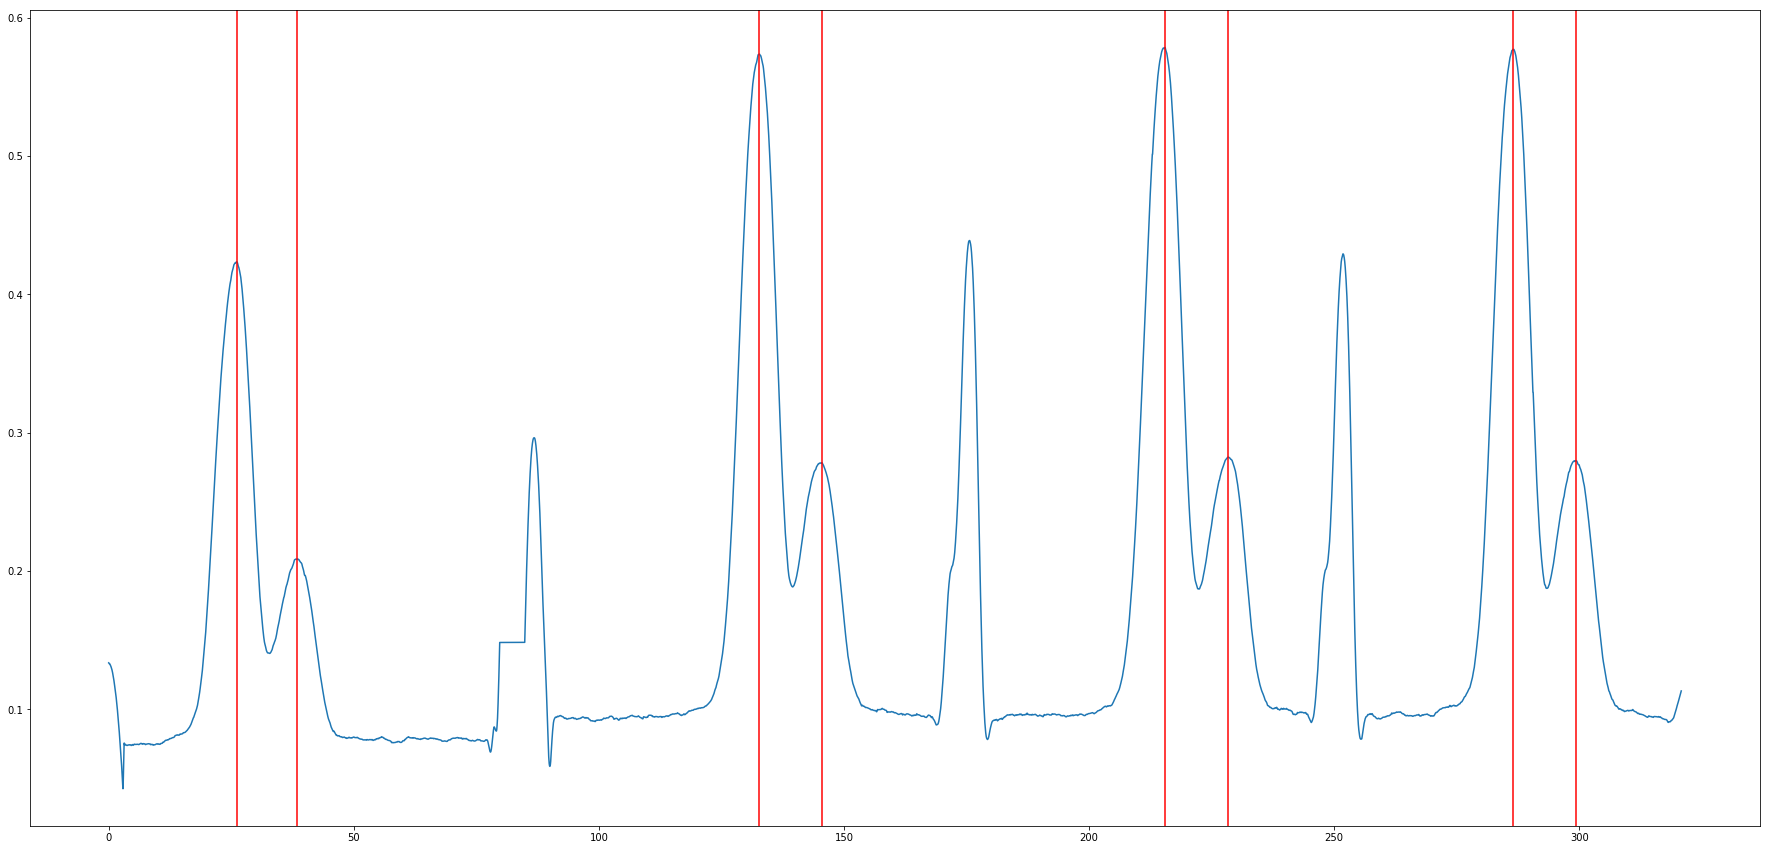

In [45]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
xcoords = [0.22058956, 0.33088437, 2.20589566]
for xc in xmax_2:
    plt.axvline(x=xc, color = 'r')
plt.show()

In [46]:
xmax = [indexes[i] for i in ind]
dfpeaks = df.iloc[xmax].reset_index(drop = True)

In [64]:
dfpeaks

,ds,nA,yhat
0,26.135608,0.411704,0.423541
1,38.509632,0.207229,0.208930
2,132.714484,0.575121,0.573724
3,145.483740,0.282058,0.278372
4,215.480100,0.595728,0.578504
5,228.419436,0.285325,0.282483
6,286.453428,0.539831,0.577166
7,299.327612,0.298543,0.279833


Calculating isotope shifts

In [65]:
diff = []
for i in range(1,int(len(dfpeaks)/2) + 1):
    d = (dfpeaks.ds[i*2-1] - dfpeaks.ds[i*2-2])/12
    diff.append(d)
    

In [66]:
print(diff)
avg = sum(diff)/len(diff)
print(avg)
print()

[1.0311686666666668, 1.0641046666666678, 1.0782779999999998, 1.072848666666668]
1.0616000000000008

